# 본인과 닮은 연예인 검색기

In [1]:
import os
import cv2
import numpy as np
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as img

from PIL import Image

%matplotlib inline

### 1. Data Load

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/Exploration/ex_Data/ex5_entertainer'
file_list = os.listdir(dir_path)

***

<span>
입력용 데이터가 잘 불러오기가 되었는지 확인하기 위해 표로 시각화를 해보았다.
</span>

***

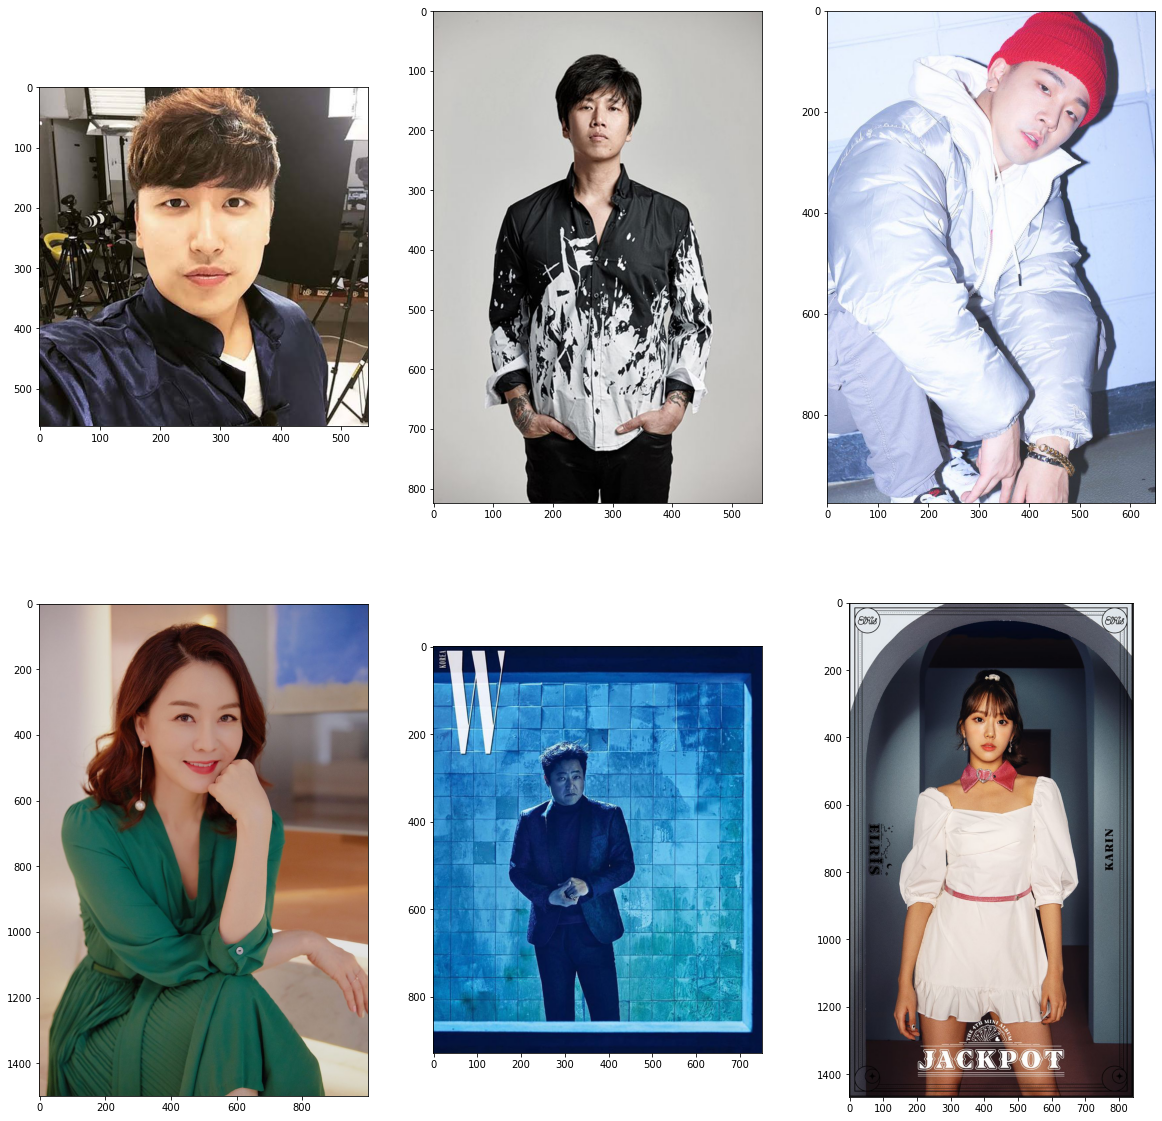

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,20))

for i, ax in enumerate(axes.flatten()):    
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

***

<span>
위 표로 데이터가 잘 불러왔음을 확인할 수 있다.
위 이미지에서 face_recognition라이브러리를 사용하여 얼굴 데이터만 추출하는 과정을 진행한다.
</span>

***

### 2. Face Cropped

+ 얼굴 데이터 추출을 위한 함수를 구현한다

In [4]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

+ 얼굴 추출 작업을 진행한다

In [5]:
crop_face_list = []

for image_file in file_list:
    img_path = os.path.join(dir_path, image_file)
    crop_face_list.append(get_cropped_face(img_path))

+ 얼굴 추출 결과를 확인하기 위해 표로 시각화를 진행해보았다

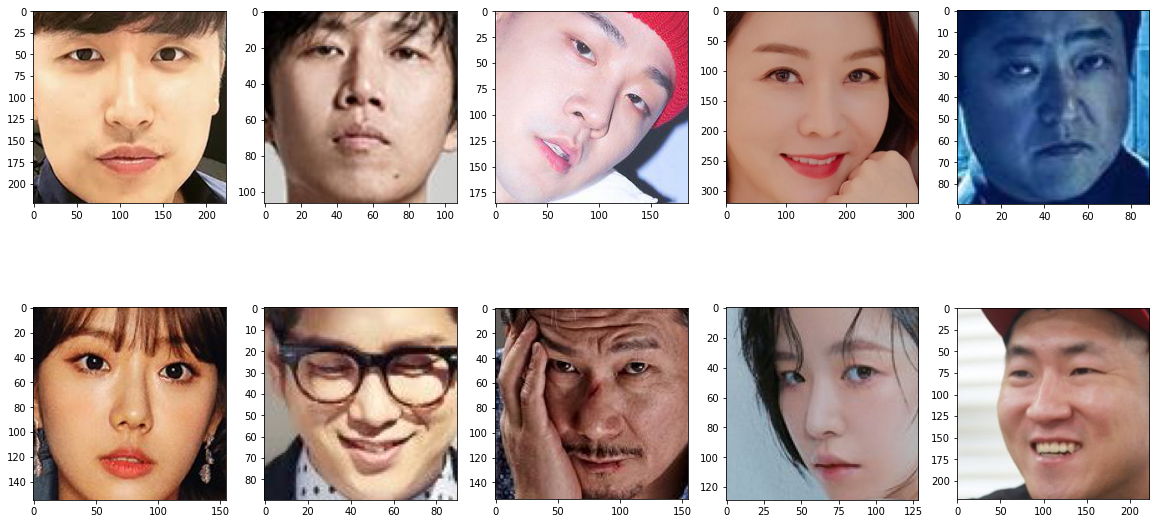

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(crop_face_list[i])
plt.show()

fig.tight_layout()

### 3. Image Embedding

+ face_recognition 라이브러리에서 지원하는 face_encodings()를 사용하여 얼굴 데이터를 임베딩 하는 과정을 진행하고자 한다.
+ 얼굴 데이터를 임베딩 작업 후, 이를 딕셔너리 자료형으로 모아 보관하고자 한다.

In [7]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    em_dict = dict()
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            em_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return em_dict

In [9]:
embedding_dict = get_face_embedding_dict(dir_path)

### 4. Face Distance

+ 본인의 얼굴과 연예인 얼굴의 임베딩 거리 측정을 위한 함수를 구현하고 거리를 측정하는 작업을 진행하고자 한다.

In [10]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('김학철', 'my_image')

0.5460824426249816

+ 임의로 선택한 김학철 연애인과 나의 거리는 0.546이 나왔다.
+ 좀 더 본인과 닮은 연애인을 찾아보기 위해 자신과 가장 거리가 가까운 연애인 Top5을 찾는 함수를 구현했다.

### 5. 자신과 가장 닮은 연애인 TOP5

In [11]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [12]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('TOP {} : {},  임베딩 거리 :({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
    return sorted_faces

In [13]:
top5_face = get_nearest_face('my_image')

TOP 1 : 김종민,  임베딩 거리 :(0.4097923579348223)
TOP 2 : 김준호,  임베딩 거리 :(0.43345010381034793)
TOP 3 : 김가영,  임베딩 거리 :(0.44906137552723036)
TOP 4 : 김정남,  임베딩 거리 :(0.4641526402299919)
TOP 5 : 홍상혁,  임베딩 거리 :(0.4739996560233669)


+ 본인과 닮은 연애인 검색기는 김종민과 가장 닮았다는 결과값을 주었다.

### 6. matplotlib으로 결과 시각화

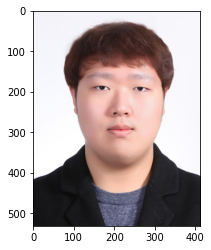

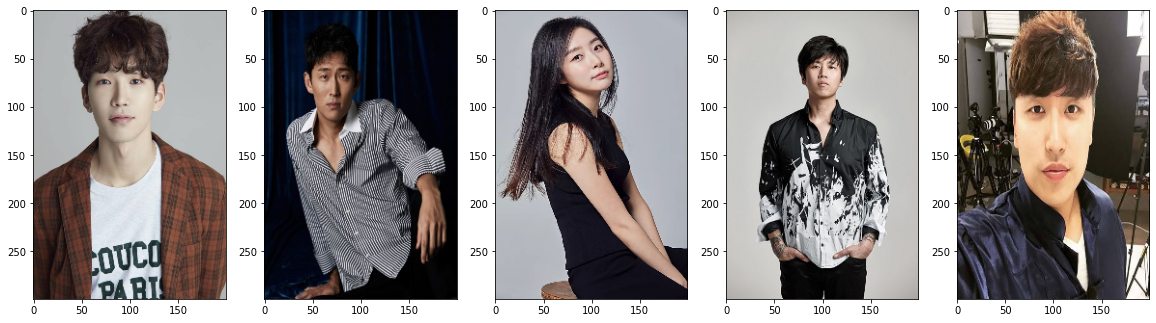

In [14]:
fig = plt.figure(figsize=(3, 4))
fig.add_subplot(1, 1, 1)
image = img.imread(dir_path+'/'+top5_face[0][0]+'.jpg')
plt.imshow(image)


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+top5_face[1+i][0]+'.jpg')
    ax.imshow(cv2.resize(image, (200,300)))
plt.show()

fig.tight_layout()